<a href="https://colab.research.google.com/github/snovamo86861/MachineLearning/blob/master/Regresion_Linear_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementación de regresión lineal en Pytorch, Regresión logística, Implementación de regresión logística en Pytorch**


In [0]:

#Importar modulos
import torch
import numpy as np #para trabajar con arreglos
import torch.nn as nn #regresion linear
import torch.optim as optim # optimizacion necesria 
import matplotlib.pyplot as plt

Regresion Linear

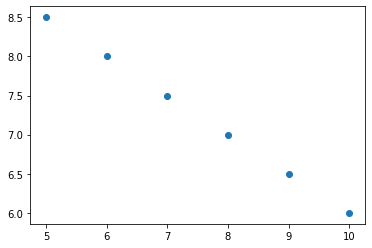

In [32]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8.0, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [33]:
#De numpy a tensor
#1 Arreglo 
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)
prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [34]:
#Convertir a tensor en los dos casos
prices = torch.from_numpy(prices_array).float().requires_grad_(True)

units = torch.from_numpy(units_array).float()

prices, prices.shape


(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

tensor(0.0182, grad_fn=<MseLossBackward>)


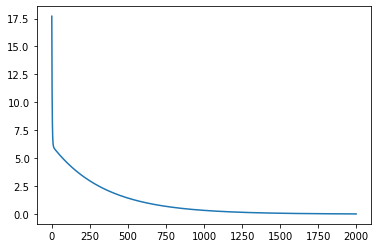

In [35]:
model = nn.Linear(1, 1)
loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015) #lr  pasos para memorizar el loss

losses = []
iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(loss)
plt.plot(range(iterations), losses)

In [36]:
#Prediccion

X = torch.Tensor([[4.0]])
p = model(X)
p

tensor([[8.7011]], grad_fn=<AddmmBackward>)

### Implementación de regresión logística en **Pytorch**

In [0]:
#Importar modulos
import torch
import numpy as np #para trabajar con arreglos
import torch.nn as nn #regresion linear
import torch.optim as optim # optimizacion necesria 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [19]:
n = 100 
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[ 1.15943009e+00,  6.10545490e-01],
       [-1.57076293e+00,  3.35170854e+00],
       [ 4.48644747e+00, -2.78413348e+00],
       [-5.36110370e+00,  7.45997748e+00],
       [-3.16276106e-02, -3.68994298e+00],
       [-4.56440971e+00, -3.38506706e+00],
       [-5.41984347e+00, -1.48827934e+00],
       [-1.02909336e-03,  8.91191465e-01],
       [-1.24977227e+00, -6.01792094e+00],
       [ 5.41435567e-01,  1.07556942e+00],
       [-3.89340824e+00, -2.33957642e+00],
       [ 1.52988305e+00,  3.78613870e+00],
       [ 3.34017864e+00, -1.21527456e+00],
       [-1.87881422e+00,  1.48734098e-01],
       [ 2.82233435e+00, -5.10267199e+00],
       [ 2.35030631e+00, -2.04266621e-01],
       [ 2.70703253e+00,  1.19793369e-01],
       [-2.45887163e+00, -2.08102439e-01],
       [ 2.31945388e+00, -3.88153287e+00],
       [ 5.12521865e+00,  3.27498259e+00],
       [ 1.45717521e+00,  6.86696552e+00],
       [ 9.66926038e-01,  1.31305772e+00],
       [ 2.24805870e+00, -5.41935578e+00],
       [-1.

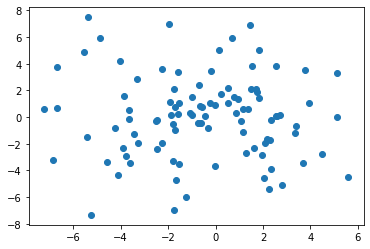

In [23]:
#preparar los datos
plt.scatter(data[:,0], data[:,1])

In [0]:
data[:h, :]= data[:h, :] - 3*np.ones((h,dimen))


In [0]:
data[:h, :]= data[:h, :] + 3*np.ones((h,dimen))

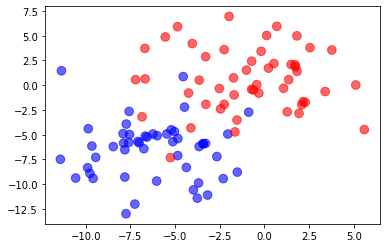

In [44]:
colors = ['blue','red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)


In [45]:
target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape



(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.2220, grad_fn=<BinaryCrossEntropyBackward>)

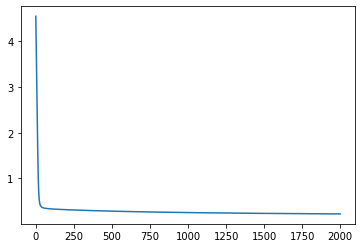

In [57]:

model = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
      )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 2000

for i in range(iterations):
  result = model(x)

  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)

loss





In [60]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
#prediction
print(colors[prediction])

blue


In [61]:
red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
#prediction
print(colors[prediction])

red


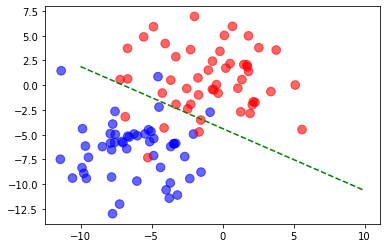

In [62]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

#linspace distribuye todos los numeros entre los dos parametros de enetrada que 
#le envie
x_axis = np.linspace(-10, 10, n)

#Y utilizo los pesos que obtuve del modelo y eso lo grafico sobre el scatter que 
#ya tenia antes. 
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')